In [1]:
from _plotting import plot_compare_images, plot_compare_image_differences, plot_comparison_row
from _analysis_functions import load_and_combine_dfs, format_cols
import pandas as pd

In [4]:
# DeepJanus
dj_df = load_and_combine_dfs(path="/home/oliver/NSExperimentation/",filters=["DeepJanus", "SVHN"])
dj_df = format_cols(dj_df)
# Sinvad
sinv_df = load_and_combine_dfs(path="/home/oliver/NSExperimentation/",filters=["sinvad", "svhn"])
sinv_df = format_cols(sinv_df)
# SMOO
smoo_df = format_cols(pd.read_csv(f"results/results_lmt_SVHN_wrn_sg2_ubtgn.csv"))

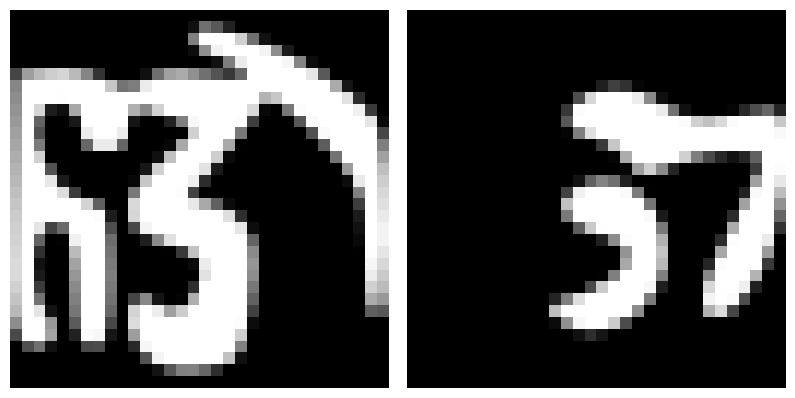

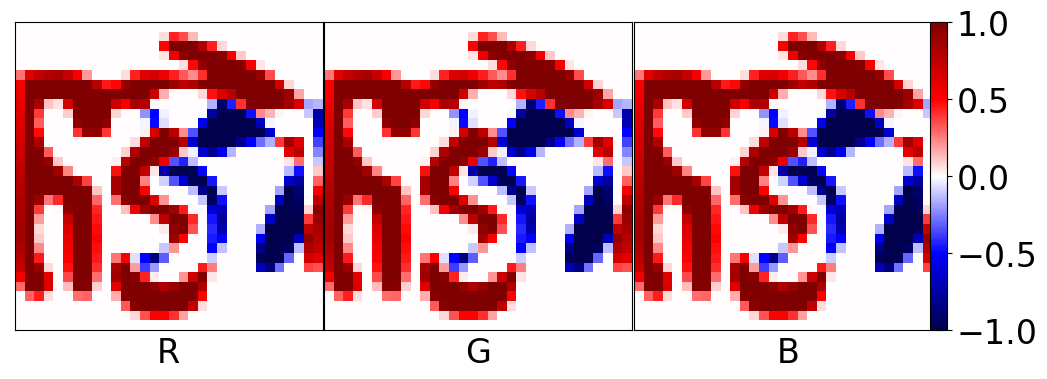

In [5]:
dp = 3
i1, i2 = dj_df["X"][dp].transpose(1,2,0), dj_df["X_prime_1"][dp].transpose(1,2,0)
plot_compare_images(i1,i2, save_as=f"figures/qualitative/DJ_SVHN_im")
plot_compare_image_differences(i1,i2, save_as=f"figures/qualitative/DJ_SVHN_im_diff")

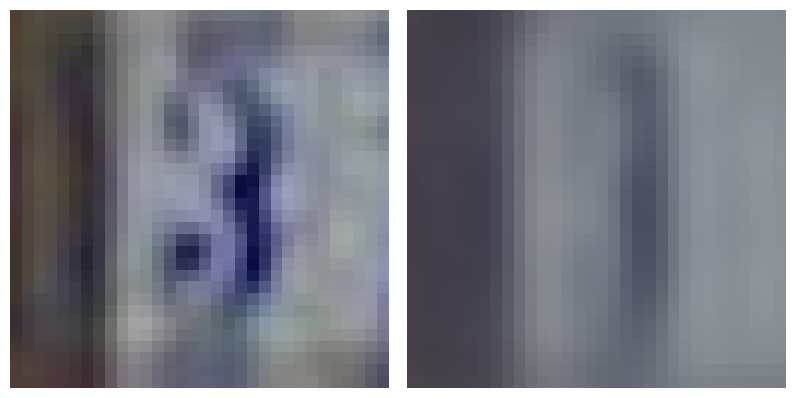

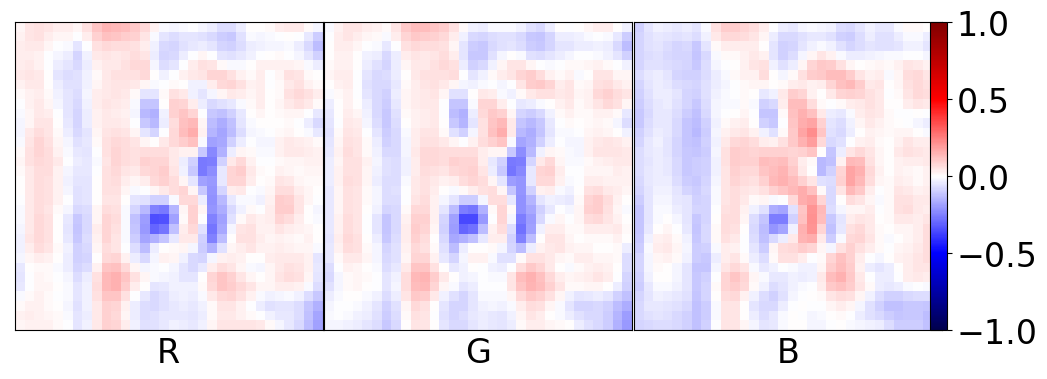

In [6]:
dp = 4
i1, i2 = sinv_df["X"][dp].transpose(1,2,0), sinv_df["X_prime"][dp].transpose(1,2,0)
plot_compare_images(i1,i2, save_as=f"figures/qualitative/Sinv_SVHN_im")
plot_compare_image_differences(i1,i2, save_as=f"figures/qualitative/Sinv_SVHN_diff")

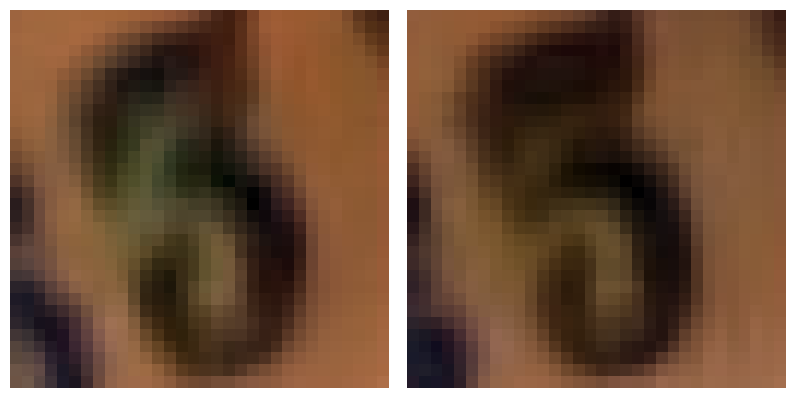

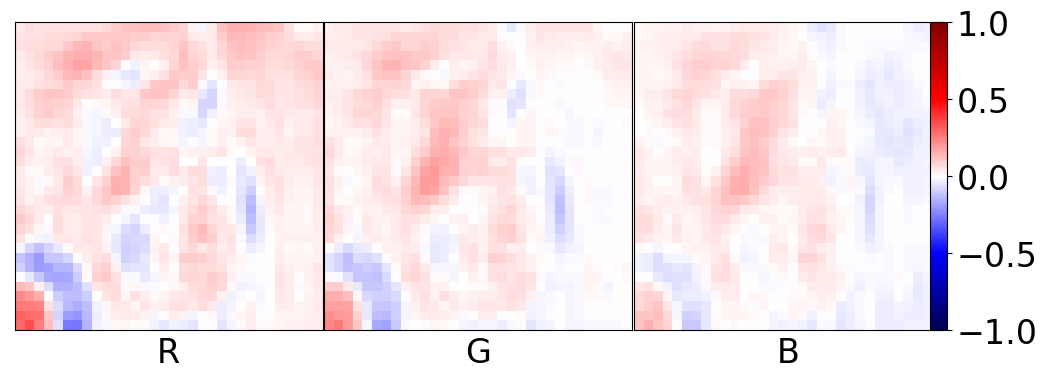

In [7]:
dp = 35
i1, i2 = smoo_df["X"][dp].transpose(1,2,0), smoo_df["X_prime"][dp].transpose(1,2,0)
plot_compare_images(i1,i2, save_as=f"figures/qualitative/SMOO_SVHN_im")
plot_compare_image_differences(i1,i2, save_as=f"figures/qualitative/SMOO_SVHN_diff")

In [8]:
# Sinvad
sinv_df = load_and_combine_dfs(path="/home/oliver/NSExperimentation/",filters=["sinvad", "imagenet"])
sinv_df = format_cols(sinv_df)
# SMOO
dfs = [pd.read_csv(f"results/results_lmt_Imagenet_wrn_sgXL_ubtgn_{i}.csv") for i in range(10)]
smoo_df = pd.concat(dfs, ignore_index=True)
smoo_df = format_cols(smoo_df)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


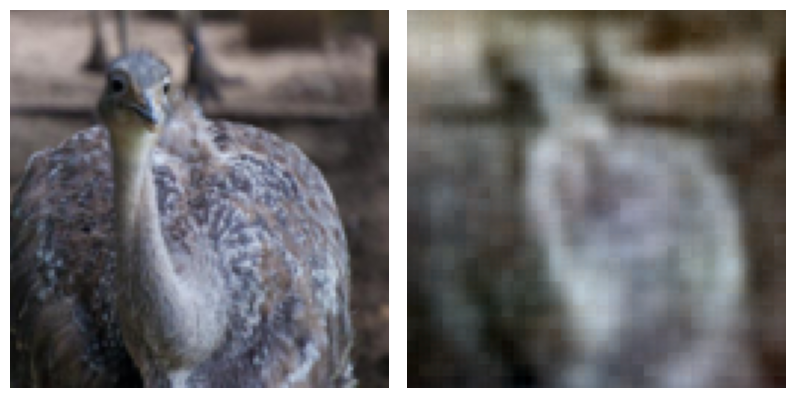

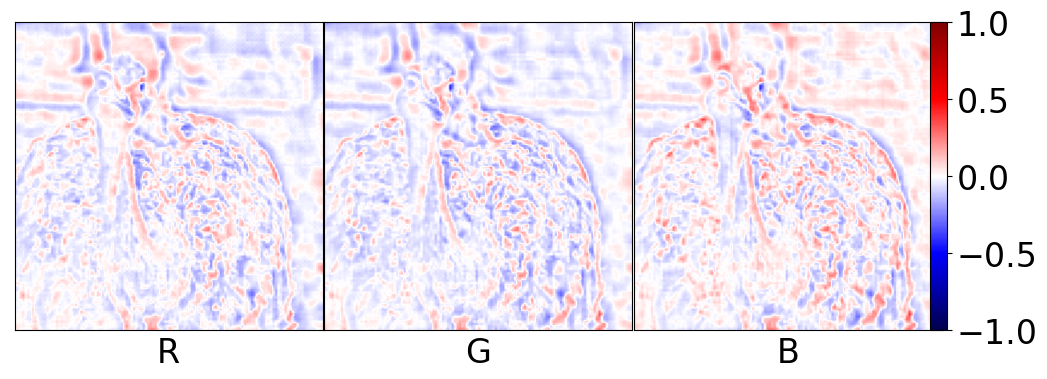

In [9]:
dp = 84
i1, i2 = sinv_df["X"][dp].transpose(1,2,0), sinv_df["X_prime"][dp].transpose(1,2,0)
plot_compare_images(i1,i2, save_as="figures/qualitative/Sinv_Imagenet_im")
plot_compare_image_differences(i1,i2, save_as="figures/qualitative/Sinv_Imagenet_diff")

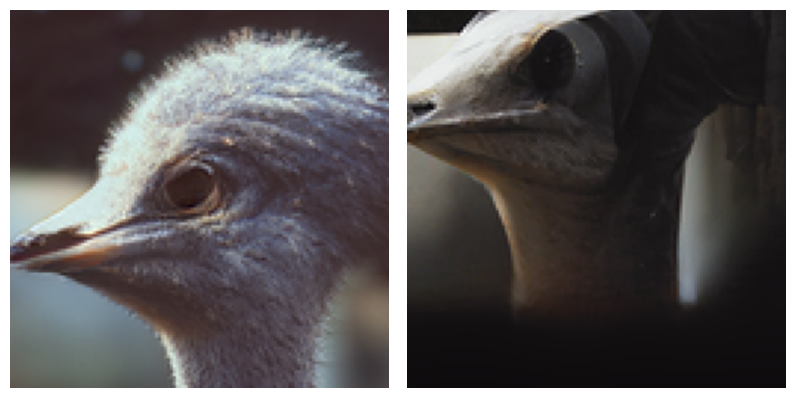

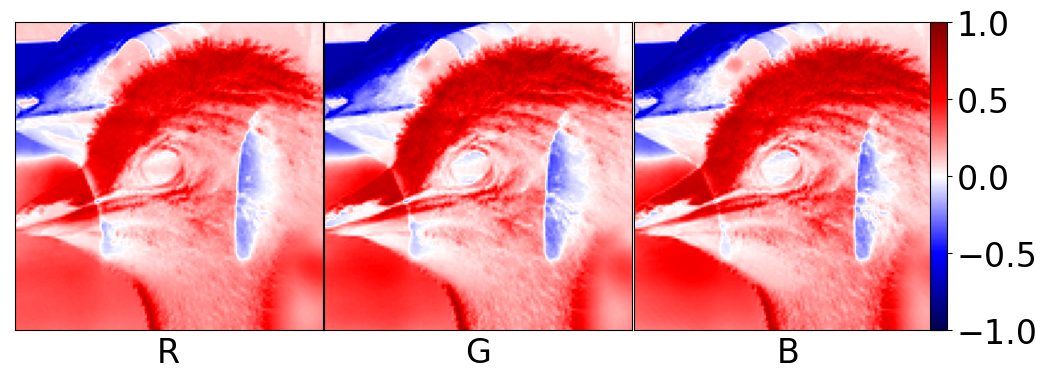

In [10]:
dp = 92
i1, i2 = smoo_df["X"][dp].transpose(1,2,0), smoo_df["X_prime"][dp].transpose(1,2,0)
plot_compare_images(i1,i2, save_as="figures/qualitative/SMOO_Imagenet_im") #  save_as=f"qualitative/SMOO_SVHN_im"
plot_compare_image_differences(i1,i2, save_as="figures/qualitative/SMOO_Imagenet_diff") #  save_as=f"qualitative/SMOO_SVHN_diff"

### Plot row comparison between samples

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
labels = {
    "mnist": [str(i) for i in range(10)],
    "fashionmnist": ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],
    "svhn": [str(i) for i in range(10)],
    "cifar10": ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog" ,"horse", "ship", "truck"],
    "imagenet": ["tench", "goldfish", "great white\nshark", "tiger shark", "hammerhead\nshark", "electric\nray", "stringray", "cock", "hen", "ostrich"],
}

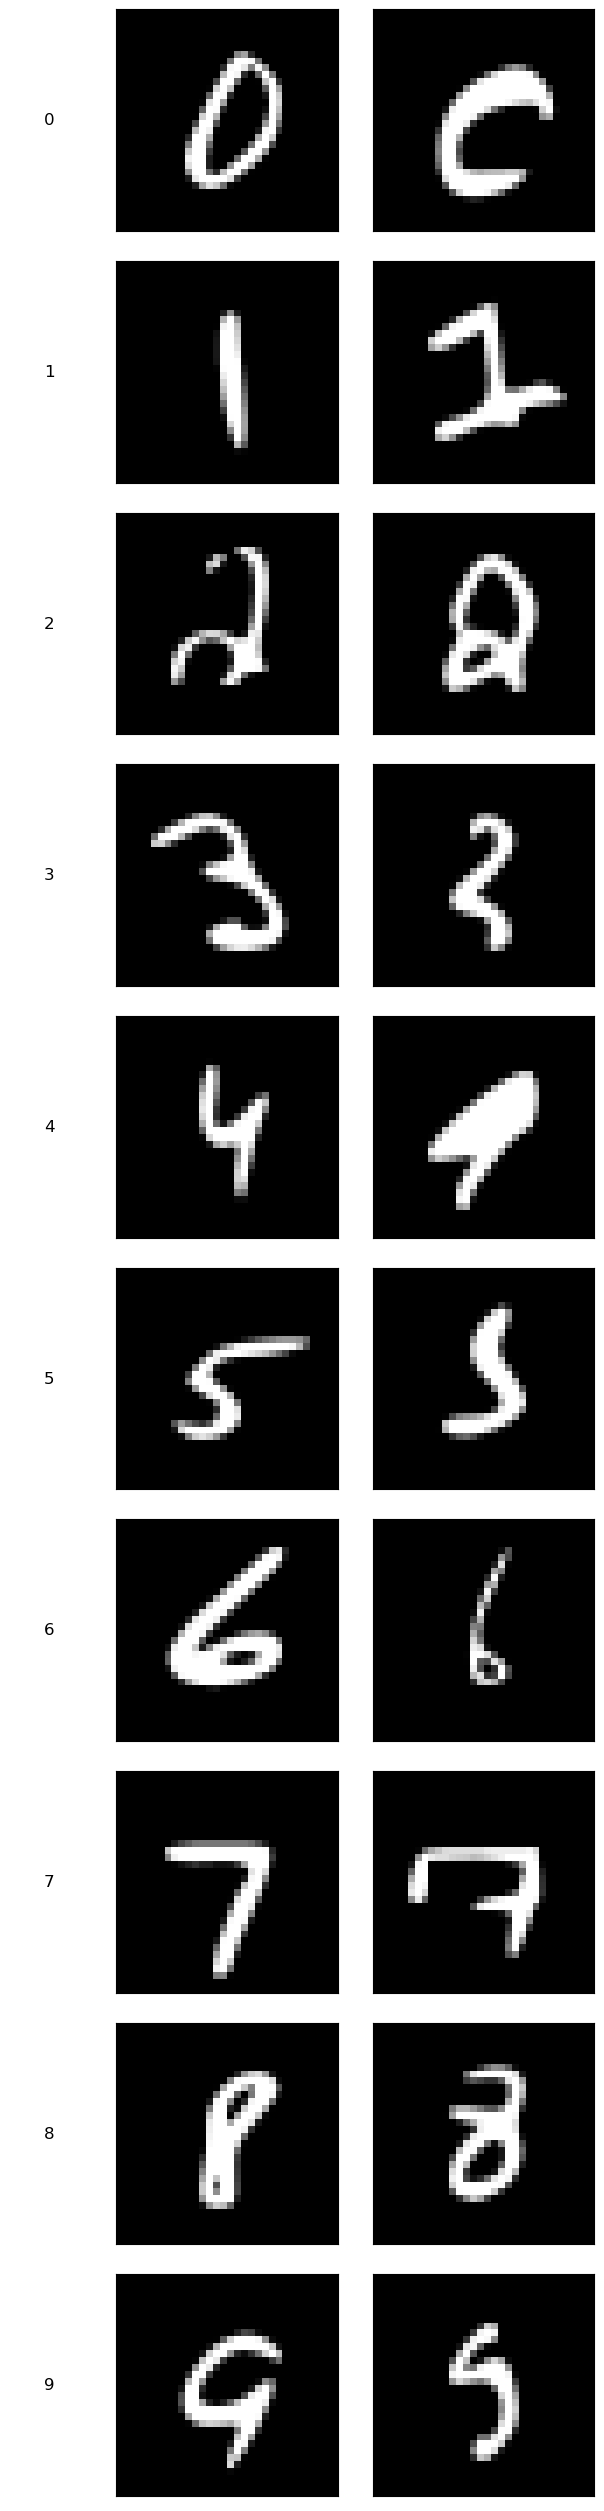

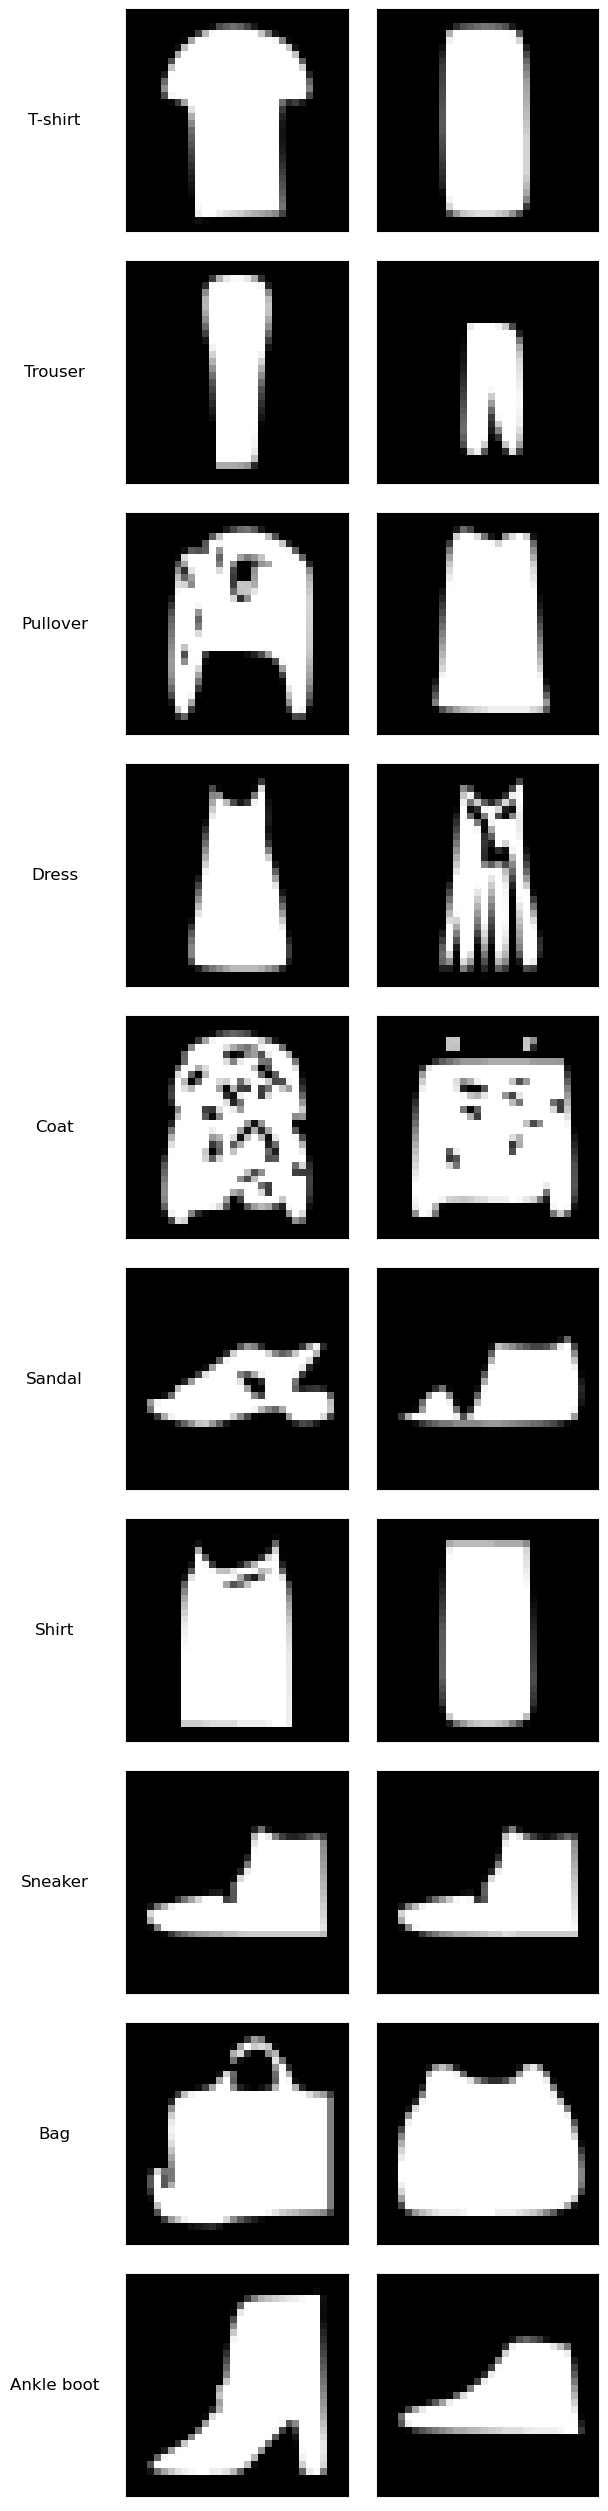

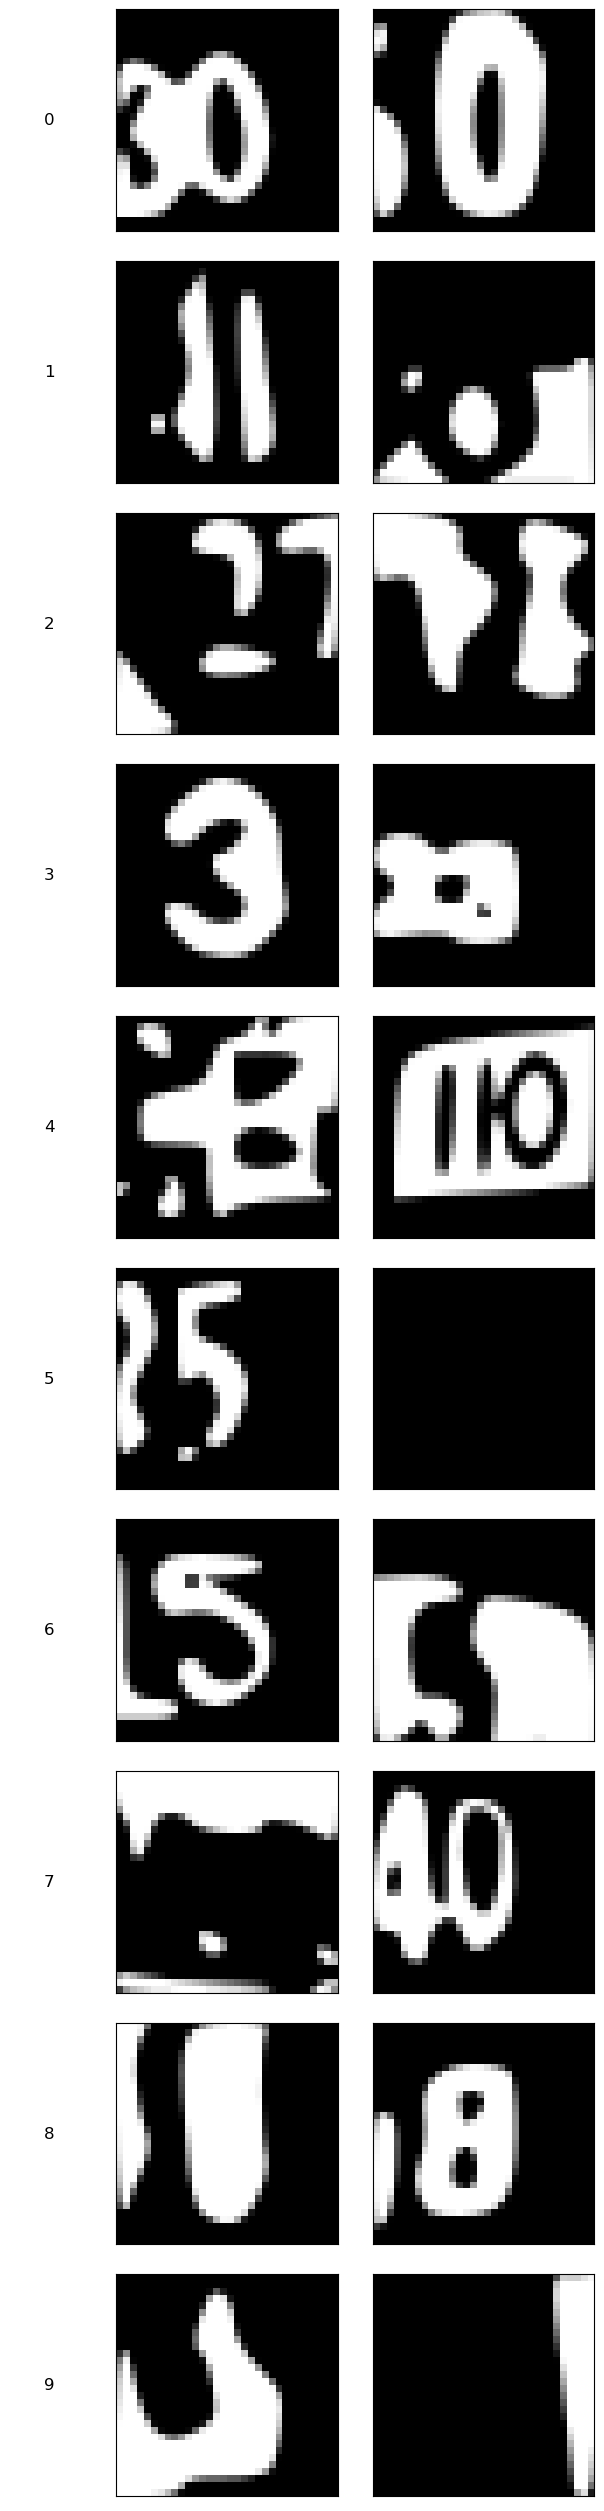

In [3]:
for e in ["MNIST", "FashionMNIST", "SVHN"]:
    orig_df = load_and_combine_dfs(path="/home/oliver/NSExperimentation/", filters=["DeepJanus", e])
    dj_df = format_cols(orig_df)
    dj_df["lab"] = dj_df["y"].apply(np.argmax)
    x, xp = dj_df["X"].values.tolist(), dj_df["X_prime_1"].values.tolist()

    pairs = []
    for i in range(10):
        slice = dj_df[dj_df["lab"]==i]
        xs, xps, = slice["X"].values.tolist(), slice["X_prime_1"].values.tolist()
        pairs.append((xs[0].transpose(1,2,0), xps[0].transpose(1,2,0)))
    plot_comparison_row(pairs, labels.get(e.lower()), save_as=f"figures/qualitative/DJ_pair_comp_{e.lower()}")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


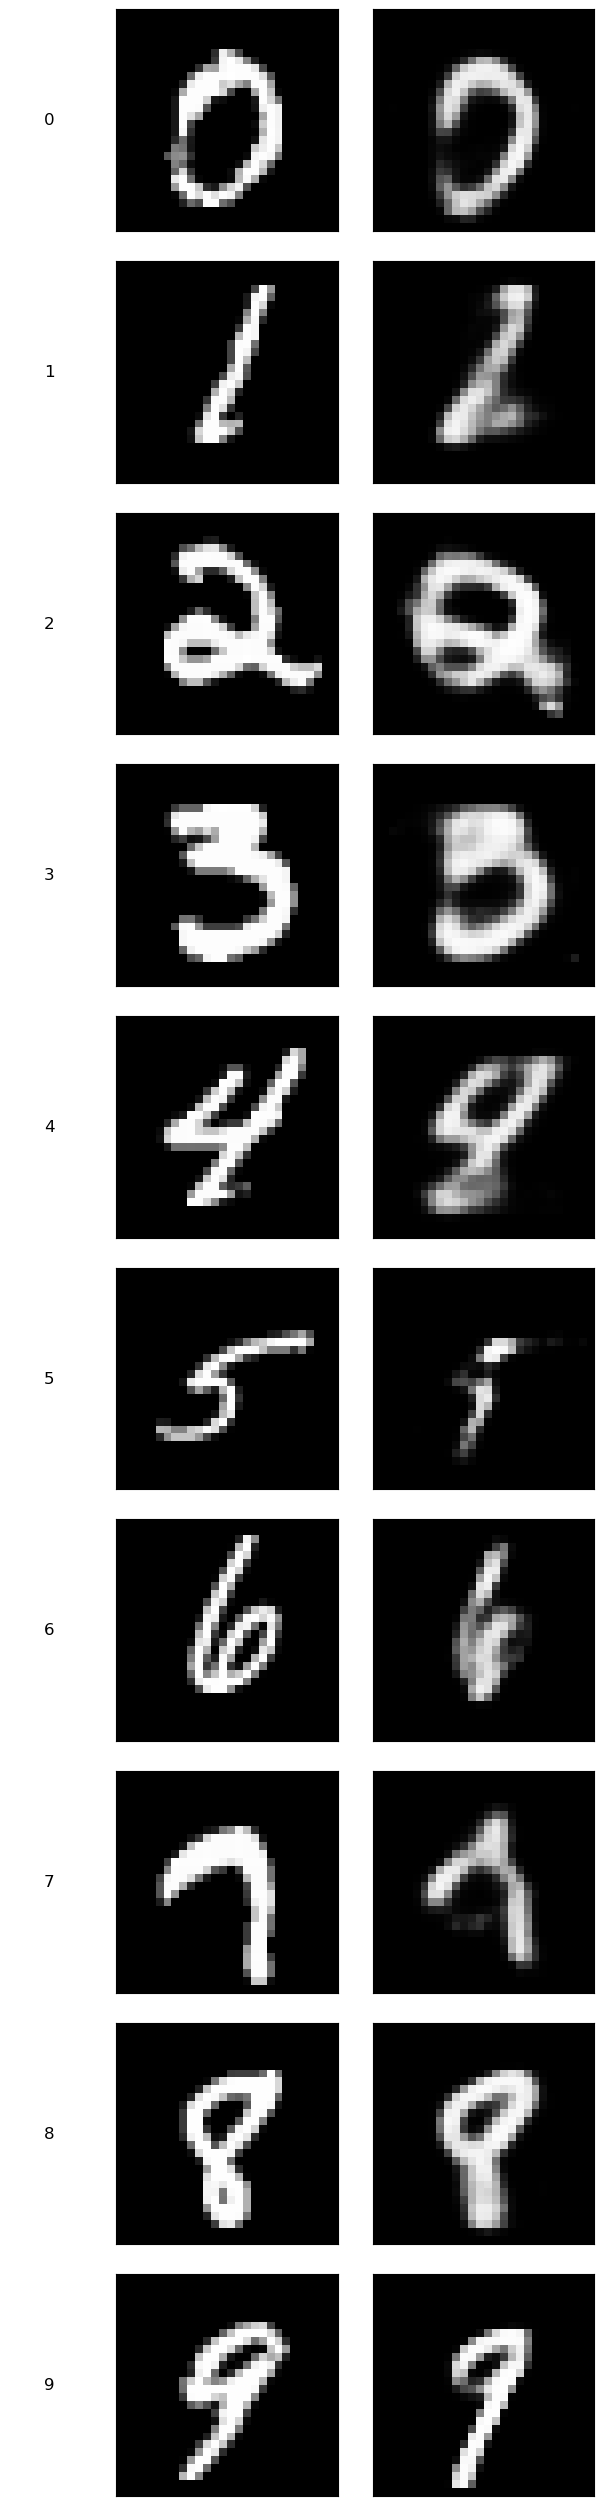

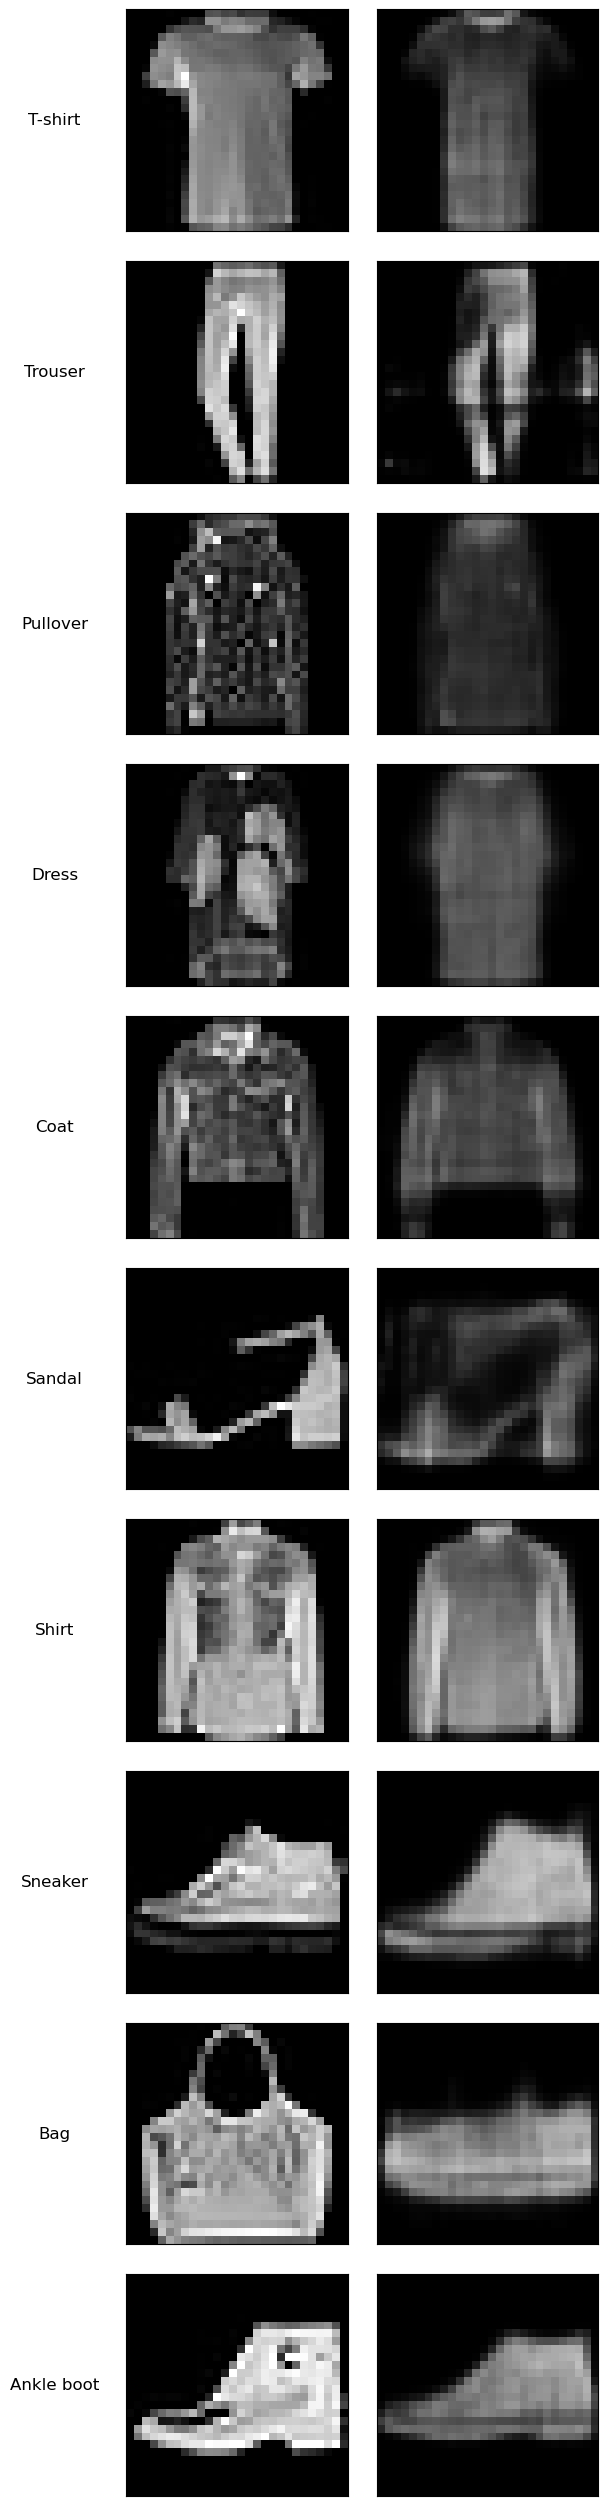

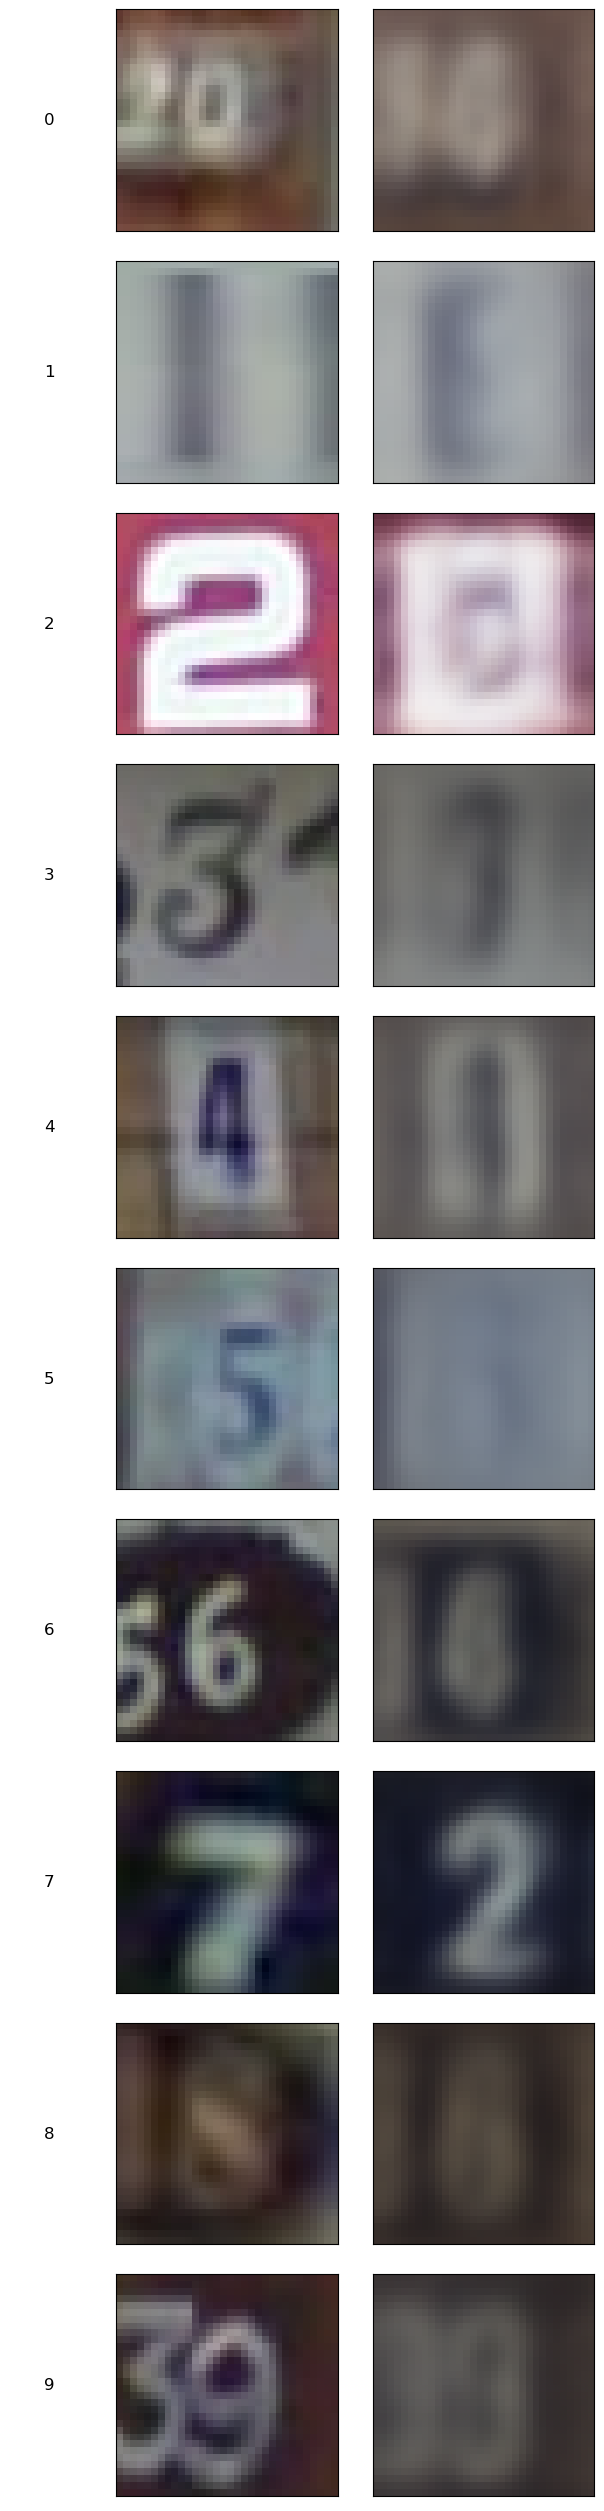

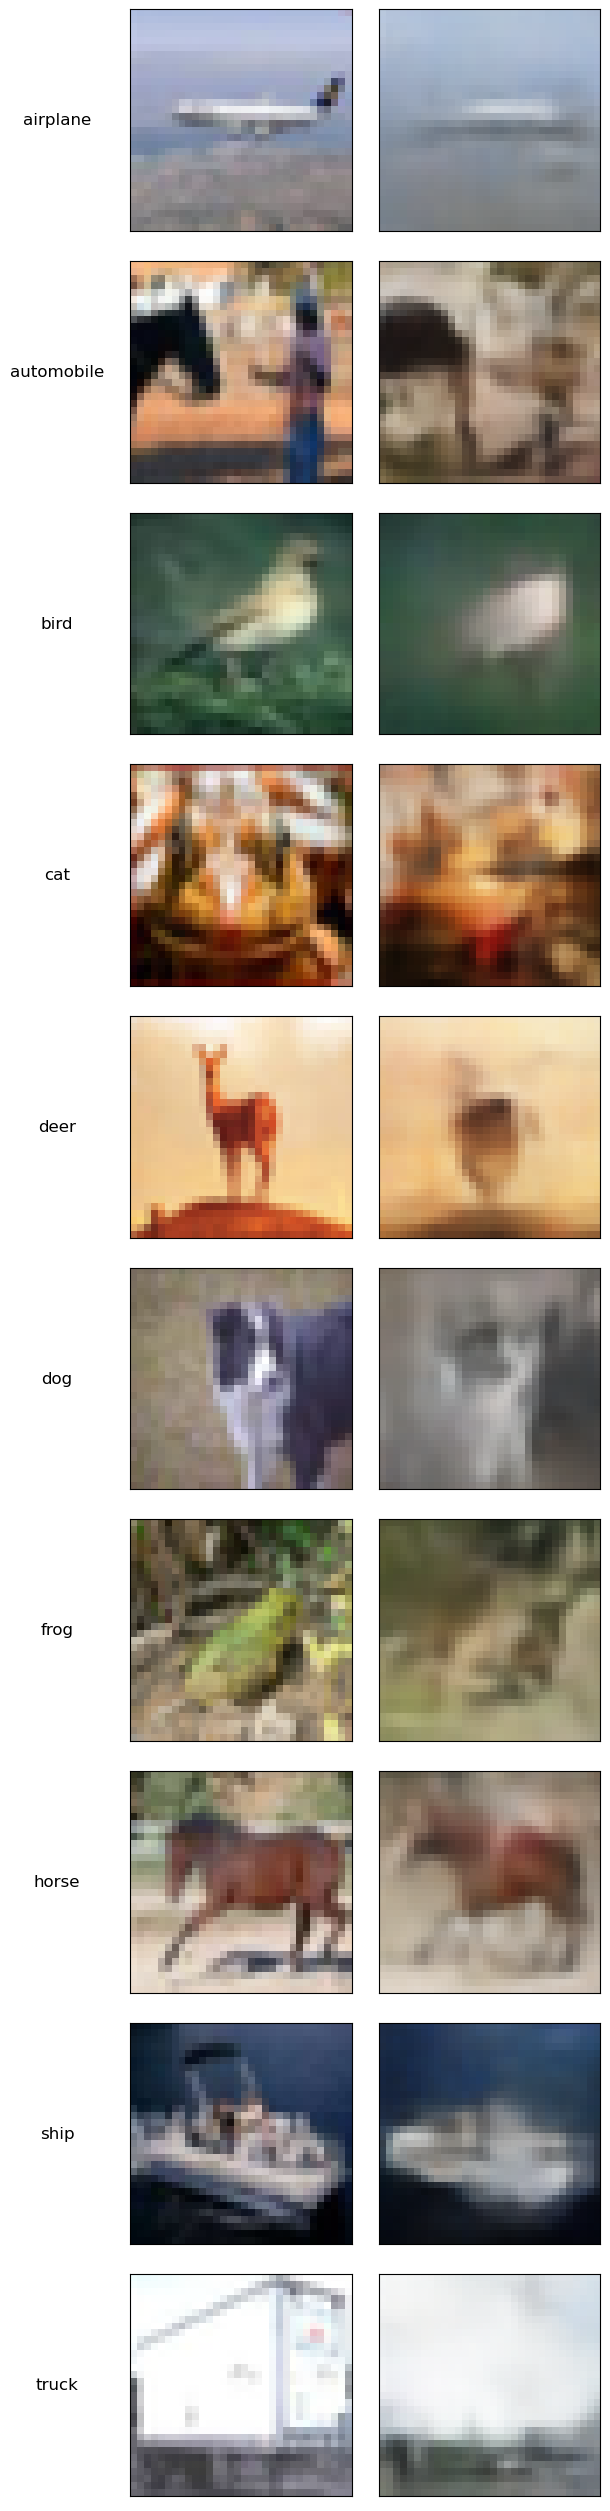

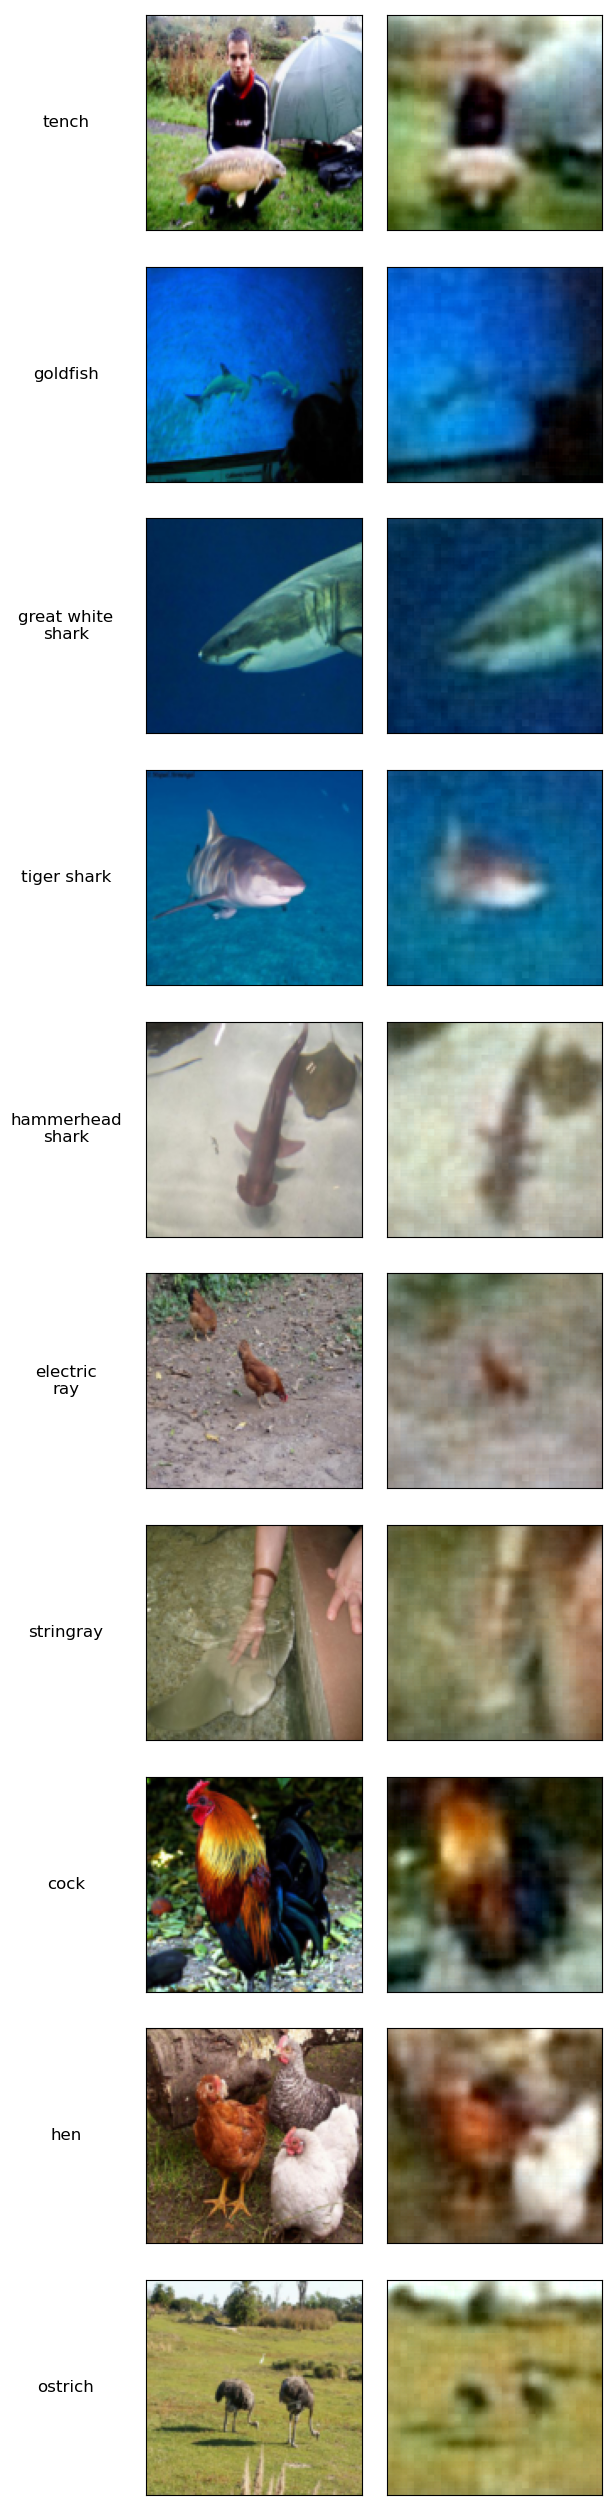

In [4]:
for e in ["mnist", "fmnist", "svhn", "cifar10", "imagenet"]:
    sin_df = load_and_combine_dfs(path="/home/oliver/NSExperimentation/", filters=["sinvad", e])
    sin_df = format_cols(sin_df)
    sin_df = sin_df.sample(frac=1)

    sin_df["lab"] = sin_df["y"].apply(np.argmax)
    x, xp = sin_df["X"].values.tolist(), sin_df["X_prime"].values.tolist()

    pairs = []
    for i in range(10):
        slice = sin_df[sin_df["lab"]==i]
        xs, xps, = slice["X"].values.tolist(), slice["X_prime"].values.tolist()
        x1, x2 = xs[0], xps[0]
        if x1.ndim == 2:
            x1 = np.expand_dims(x1, -1)
            x1 = x1.repeat(3, -1)
        else:
            x1=x1.transpose(1,2,0)

        if x2.ndim == 2:
            x2 = np.expand_dims(x2, -1)
            x2 = x2.repeat(3, -1)
        else:
            x2=x2.transpose(1,2,0)
        pairs.append((x1, x2))
    e = "fashionmnist" if e == "fmnist" else e
    plot_comparison_row(pairs, labels.get(e.lower()), save_as=f"figures/qualitative/Sinv_pair_comp_{e.lower()}")

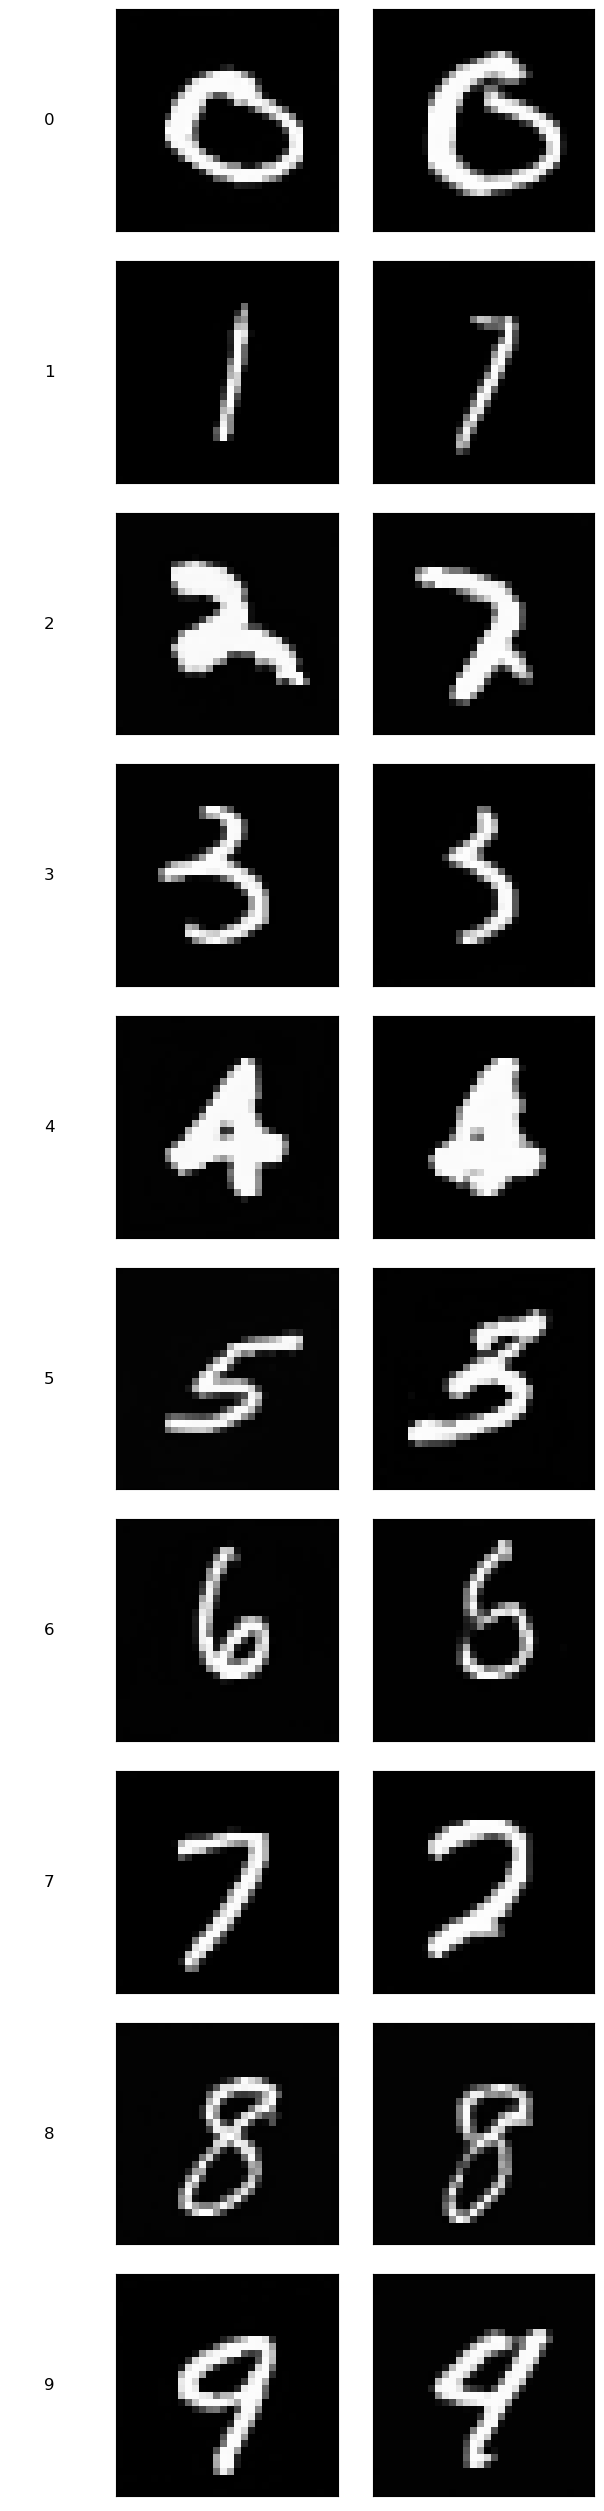

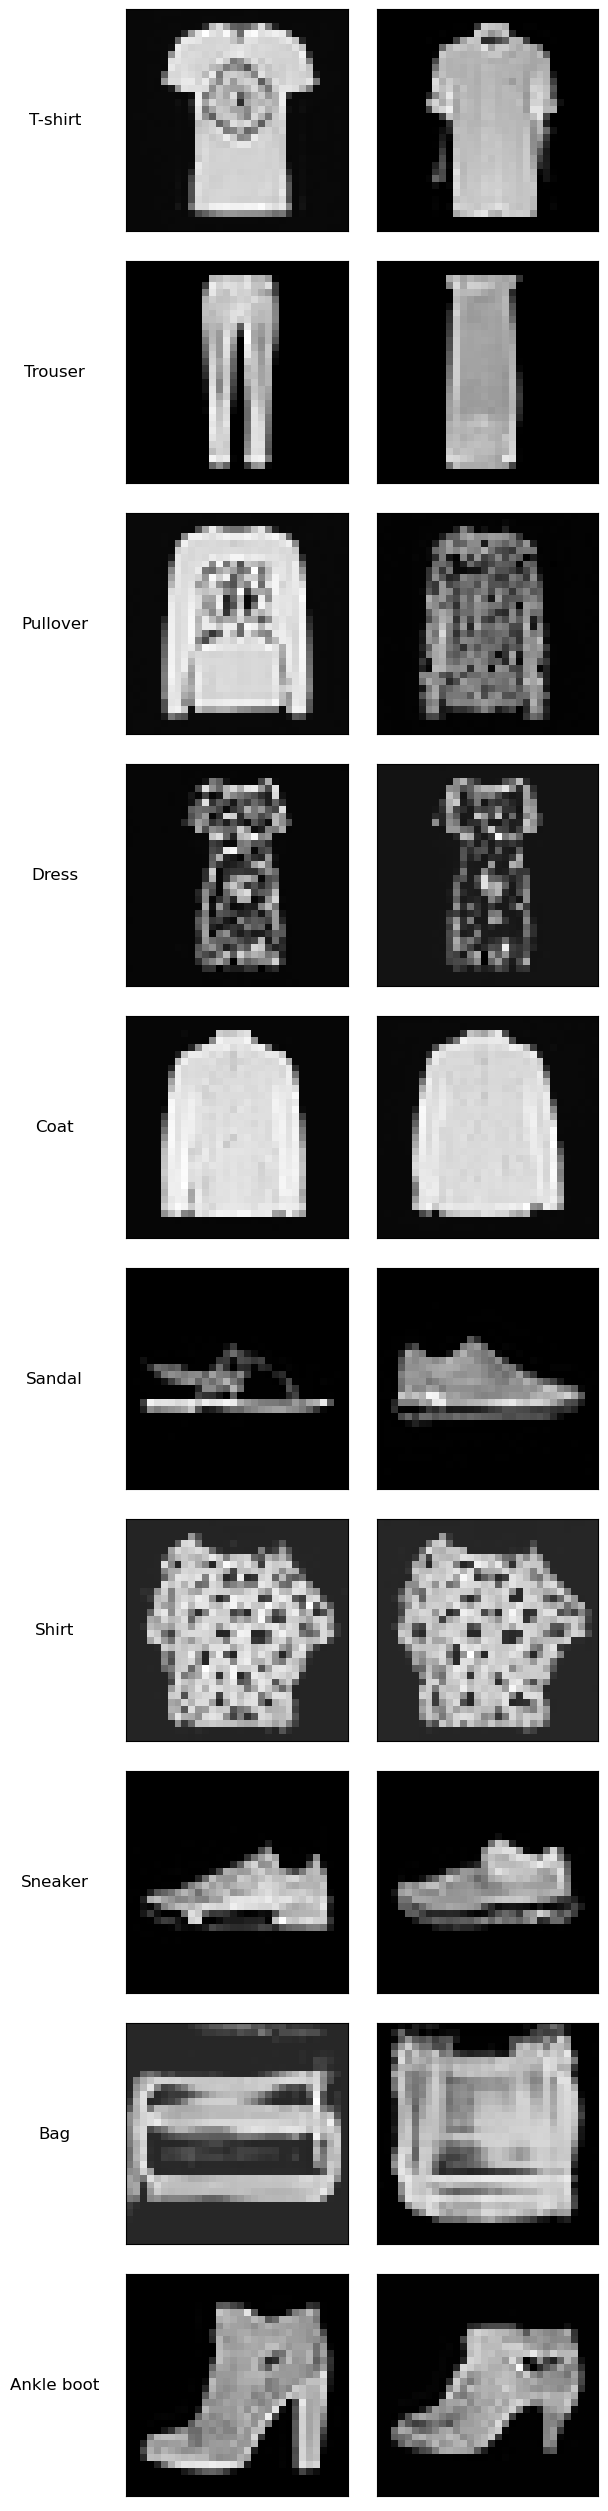

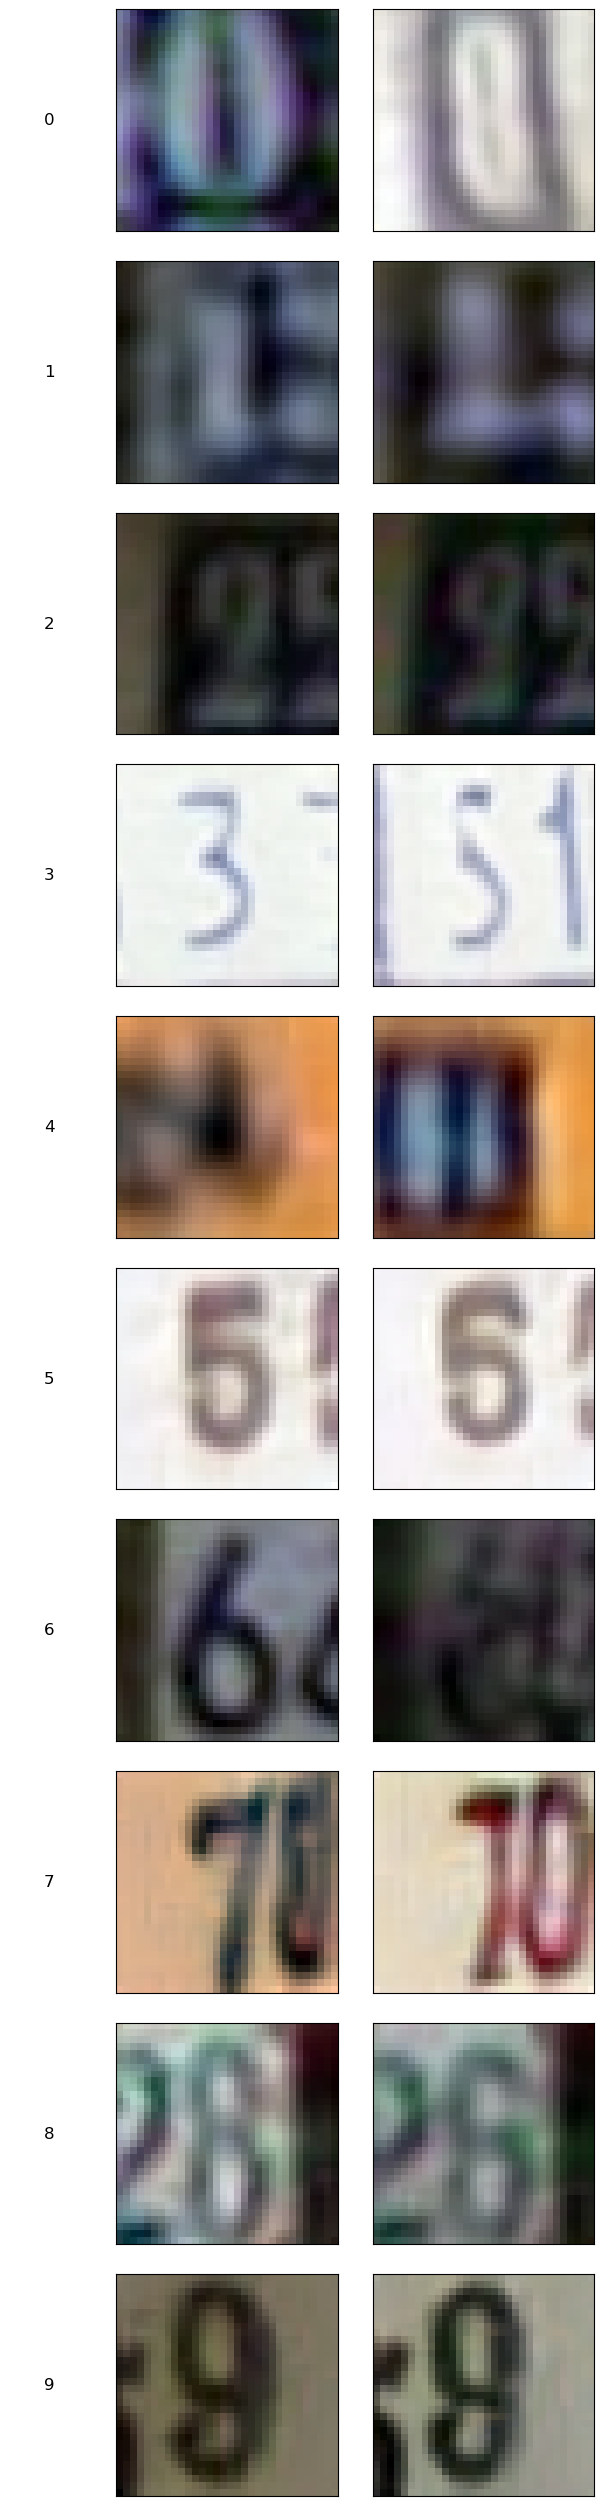

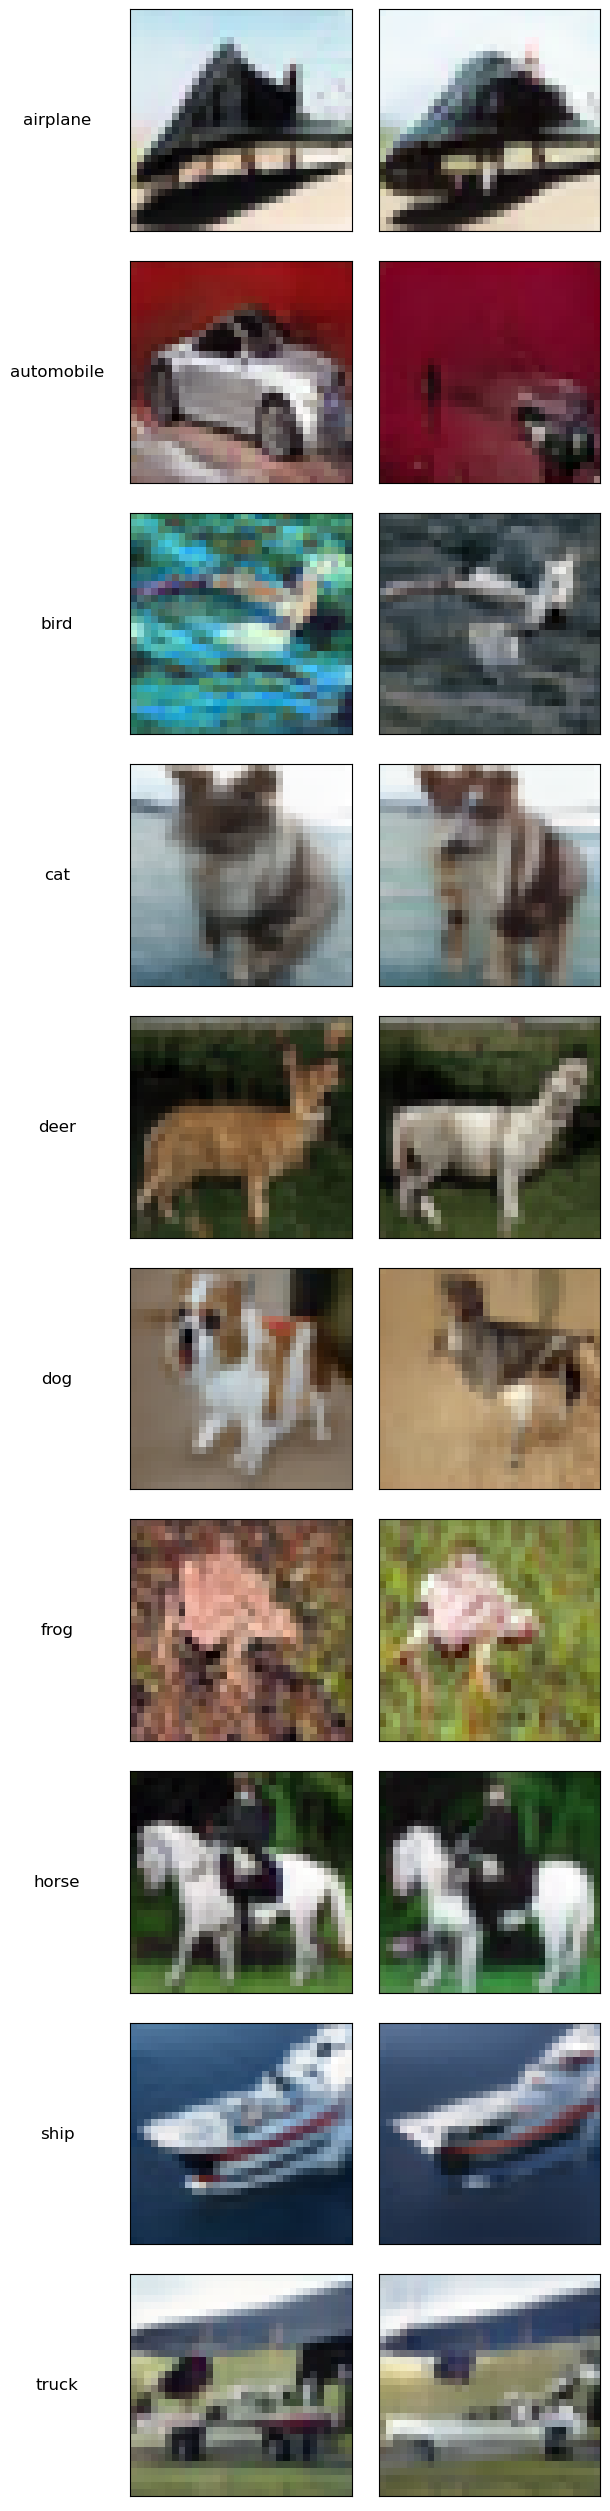

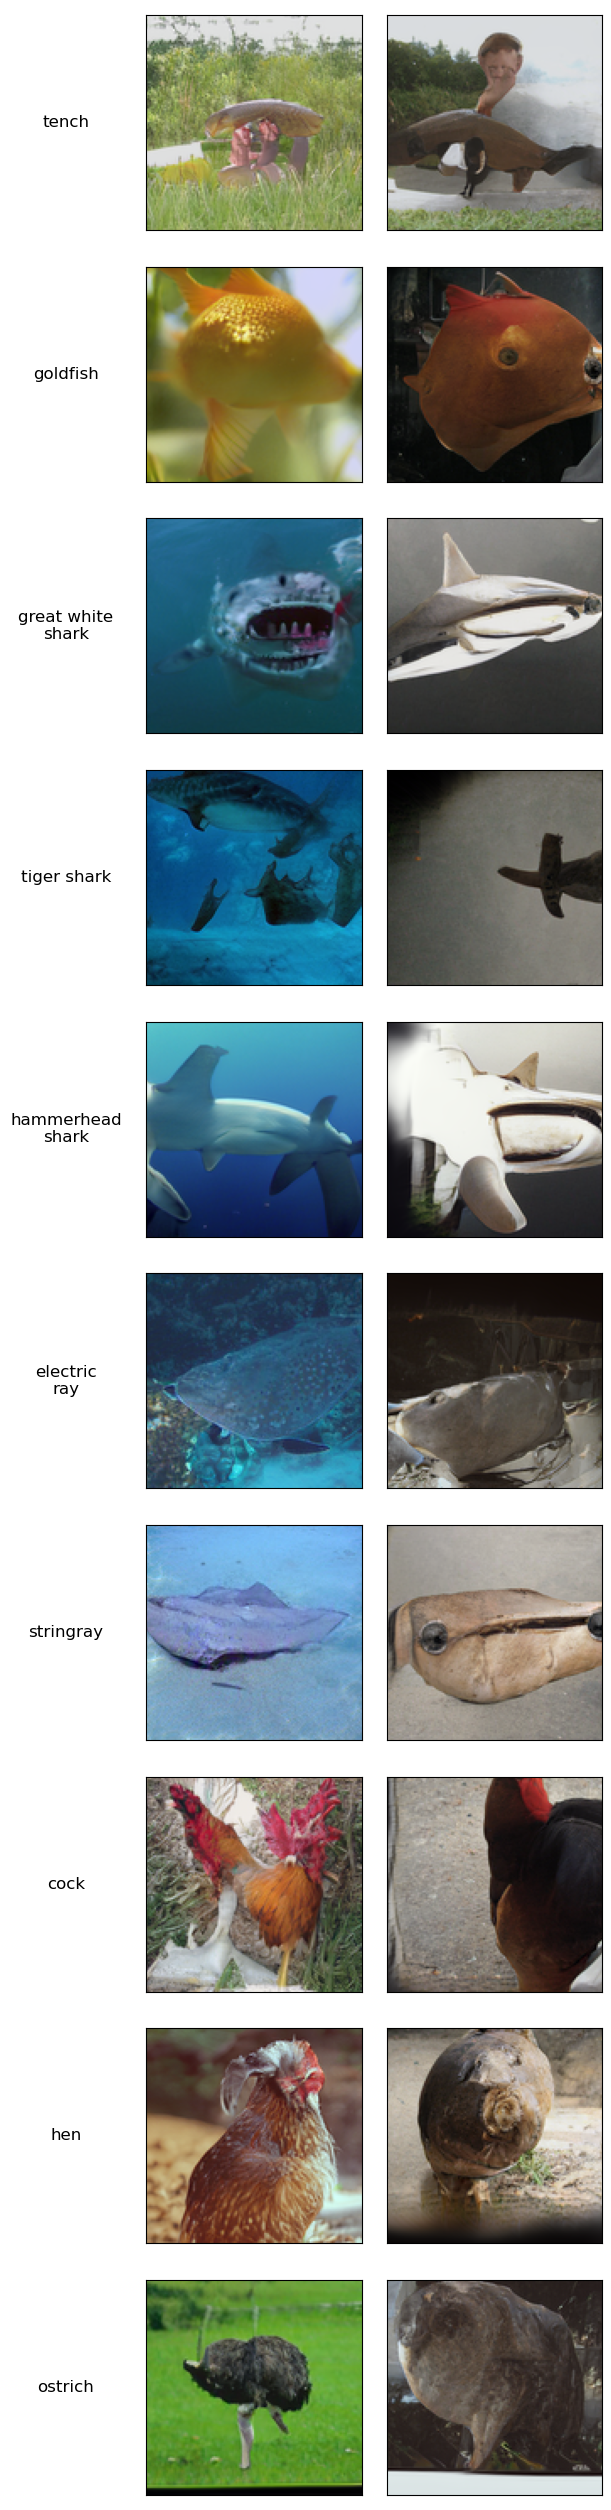

In [5]:
exps = ["MNIST","FashionMNIST", "SVHN", "CIFAR10", "Imagenet"]
for e in exps:
    if e == "Imagenet":
        dfs = [pd.read_csv(f"results/results_lmt_Imagenet_wrn_sgXL_ubtgn_{i}.csv") for i in range(10)]
        smoo_df = pd.concat(dfs, ignore_index=True)
    else:
        smoo_df = pd.read_csv(f"results/results_lmt_{e}_wrn_sg2_ubtgn.csv")
    smoo_df = format_cols(smoo_df)
    smoo_df["lab"] = smoo_df["y"].apply(np.argmax)
    x, xp = smoo_df["X"].values.tolist(), smoo_df["X_prime"].values.tolist()

    pairs = []
    for i in range(10):
        slice = smoo_df[smoo_df["lab"]==i]
        xs, xps, = slice["X"].values.tolist(), slice["X_prime"].values.tolist()
        pairs.append((xs[0].transpose(1,2,0), xps[0].transpose(1,2,0)))
    plot_comparison_row(pairs, labels.get(e.lower()), save_as=f"figures/qualitative/SMOO_pair_comp_{e.lower()}")